# F1 Podium Prediction

## Importing Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,KFold

## Initializing Dataset

In [2]:
dfStartingPos = pd.read_csv("assets/f1db-races-starting-grid-positions.csv")
dfRaceResults = pd.read_csv("assets/f1db-races-race-results.csv")
dfDriver = pd.read_csv("assets/f1db-drivers.csv")
dfFp1 = pd.read_csv("assets/f1db-races-free-practice-1-results.csv")
dfFp2 = pd.read_csv("assets/f1db-races-free-practice-2-results.csv")
dfFp3 = pd.read_csv("assets/f1db-races-free-practice-3-results.csv")
dfRaces = pd.read_csv("assets/f1db-races.csv")

C:\Users\larry\AppData\Local\Temp\ipykernel_14984\2880382200.py:2: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dfRaceResults = pd.read_csv("assets/f1db-races-race-results.csv")


Dropping other columns for simplicity.  
Columns for dfStartingPos:
- positionDisplayOrder
- driverId  

Columns for dfRaceResults: 
- raceId 
- positionDisplayOrder  
- driverId  

Columns for dfFp1,dfFp2,dfFp3:  
- positionDisplayOrder
- driverId  

Columns for dfDriver:  
- id
- name
- totalPodiums
- totalPolePositions

Columns for dfRaces:
- id
- year

In [3]:
col1 = ['raceId','positionDisplayOrder','driverId']
dfStartingPos = dfStartingPos[col1]
dfRaceResults = dfRaceResults[col1]
dfFp1 = dfFp1[col1]
dfFp2 = dfFp2[col1]
dfFp3 = dfFp3[col1]
dfDriver = dfDriver[['id','name','totalPodiums','totalPolePositions']]
dfRaces = dfRaces[['id','year','grandPrixId']]

In [4]:
dfStartingPos.rename(columns={"positionDisplayOrder":'startingPos'},inplace=True)
dfRaceResults.rename(columns={"positionDisplayOrder":'finishPos'},inplace=True)
dfFp1.rename(columns={"positionDisplayOrder":"fp1Pos"},inplace=True)
dfFp2.rename(columns={"positionDisplayOrder":"fp2Pos"},inplace=True)
dfFp3.rename(columns={"positionDisplayOrder":"fp3Pos"},inplace=True)
dfDriver.rename(columns={"id":'driverId'},inplace=True)
dfRaces.rename(columns={"id":"raceId"},inplace=True)

In [5]:
print(dfStartingPos.shape)
print(dfRaceResults.shape)
print(dfFp1.shape)
print(dfFp2.shape)
print(dfFp3.shape)
print(dfDriver.shape)
print(dfRaces.shape)

(25008, 3)
(26771, 3)
(15316, 3)
(14979, 3)
(8290, 3)
(903, 4)
(1125, 3)


In [ ]:
mergedRace = pd.merge(dfRaceResults,dfStartingPos,on=['raceId','driverId'],how='left')
mergedFp1 = pd.merge(mergedRace,dfFp1,on=['raceId','driverId'],how='left')
mergedFp2 = pd.merge(mergedFp1, dfFp2,on=['raceId','driverId'],how='left')
mergedFp3 = pd.merge(mergedFp2,dfFp3,on=['raceId','driverId'],how='left')


In [7]:
mergedFp3

,raceId,finishPos,driverId,startingPos,fp1Pos,fp2Pos,fp3Pos
0,1,1,nino-farina,1.0,NaN,NaN,NaN
1,1,2,luigi-fagioli,2.0,NaN,NaN,NaN
2,1,3,reg-parnell,4.0,NaN,NaN,NaN
3,1,4,yves-giraud-cabantous,6.0,NaN,NaN,NaN
4,1,5,louis-rosier,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
26766,1123,16,liam-lawson,14.0,20.0,15.0,18.0
26767,1123,17,esteban-ocon,11.0,14.0,12.0,14.0
26768,1123,18,valtteri-bottas,19.0,16.0,11.0,17.0
26769,1123,19,alexander-albon,17.0,13.0,20.0,7.0


In [8]:
print(mergedFp3)
print(mergedFp3.isnull().sum())

       raceId  finishPos               driverId  startingPos  fp1Pos  fp2Pos  \
0           1          1            nino-farina          1.0     NaN     NaN   
1           1          2          luigi-fagioli          2.0     NaN     NaN   
2           1          3            reg-parnell          4.0     NaN     NaN   
3           1          4  yves-giraud-cabantous          6.0     NaN     NaN   
4           1          5           louis-rosier          9.0     NaN     NaN   
...       ...        ...                    ...          ...     ...     ...   
26766    1123         16            liam-lawson         14.0    20.0    15.0   
26767    1123         17           esteban-ocon         11.0    14.0    12.0   
26768    1123         18        valtteri-bottas         19.0    16.0    11.0   
26769    1123         19        alexander-albon         17.0    13.0    20.0   
26770    1123         20           pierre-gasly          3.0     9.0     6.0   

       fp3Pos  
0         NaN  
1      

In [9]:
mergedDriver = pd.merge(mergedFp3,dfDriver, on=['driverId'],how='inner')
df = pd.merge(mergedDriver,dfRaces,on=['raceId'],how='inner')

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

raceId                0
finishPos             0
driverId              0
startingPos           0
fp1Pos                0
fp2Pos                0
fp3Pos                0
name                  0
totalPodiums          0
totalPolePositions    0
year                  0
grandPrixId           0
dtype: int64

In [12]:
df['podiumFinish'] = df['finishPos'].apply(lambda x: 1 if x<=3 else 0)

In [13]:
df

,raceId,finishPos,driverId,startingPos,fp1Pos,fp2Pos,fp3Pos,name,totalPodiums,totalPolePositions,year,grandPrixId,podiumFinish
18001,706,1,ralf-schumacher,3.0,8.0,7.0,1.0,Ralf Schumacher,27,6,2003,europe,1
18002,706,2,juan-pablo-montoya,4.0,11.0,4.0,2.0,Juan Pablo Montoya,30,13,2003,europe,1
18003,706,3,rubens-barrichello,5.0,12.0,2.0,10.0,Rubens Barrichello,68,14,2003,europe,1
18004,706,4,fernando-alonso,8.0,5.0,12.0,8.0,Fernando Alonso,106,22,2003,europe,0
18005,706,5,michael-schumacher,2.0,10.0,6.0,9.0,Michael Schumacher,155,68,2003,europe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,1123,16,liam-lawson,14.0,20.0,15.0,18.0,Liam Lawson,0,0,2024,las-vegas,0
26767,1123,17,esteban-ocon,11.0,14.0,12.0,14.0,Esteban Ocon,4,0,2024,las-vegas,0
26768,1123,18,valtteri-bottas,19.0,16.0,11.0,17.0,Valtteri Bottas,67,20,2024,las-vegas,0
26769,1123,19,alexander-albon,17.0,13.0,20.0,7.0,Alexander Albon,2,0,2024,las-vegas,0


In [14]:
rearrangeCol = ['driverId','name','totalPodiums','totalPolePositions','raceId','grandPrixId','startingPos','fp1Pos','fp2Pos','fp3Pos','podiumFinish','finishPos']
df = df[rearrangeCol]

In [15]:
df.describe()

,totalPodiums,totalPolePositions,raceId,startingPos,fp1Pos,fp2Pos,fp3Pos,podiumFinish,finishPos
count,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000
mean,41.232818,14.053917,903.377290,10.921268,11.150838,11.172535,10.884371,0.146940,10.938418
std,52.492749,24.152250,115.859346,6.147616,6.291947,6.343335,6.136517,0.354069,6.149967
min,0.000000,0.000000,706.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000,806.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000
50%,19.000000,3.000000,897.000000,11.000000,11.000000,11.000000,11.000000,0.000000,11.000000
75%,62.000000,18.000000,999.000000,16.000000,16.000000,16.000000,16.000000,0.000000,16.000000
max,202.000000,104.000000,1123.000000,24.000000,28.000000,29.000000,24.000000,1.000000,24.000000


## Corr. Matrix

<Axes: >

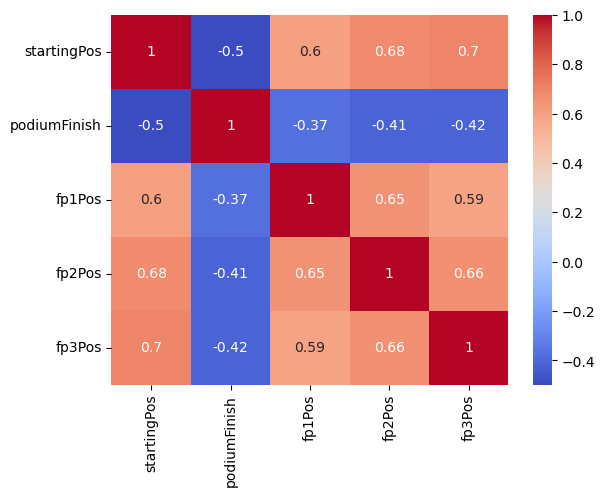

In [16]:
corr_matrix =df[['startingPos','podiumFinish','fp1Pos','fp2Pos','fp3Pos']].corr()
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm')

`startingPos` & `podiumFinish` - Negative Correlation (low startingPos -> high chance of win)

`fp1Pos`,`fp2Pos`,`fp3Pos` & `startingPos` - Positive Correlation (low fpPos -> low startingPos)

`fp1Pos`,`fp2Pos`,`fp3Pos` & `podiumFinish` - Negative Correlation (low fpPos -> high chance of win)

<Axes: >

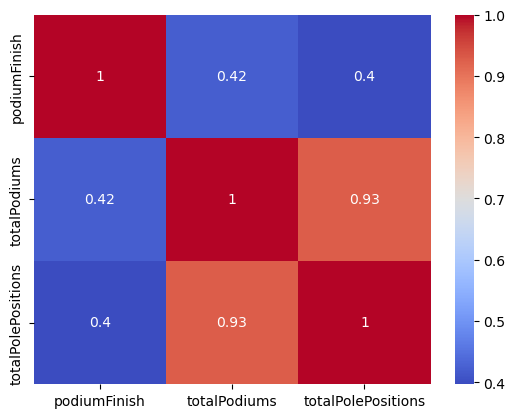

In [17]:
corr_matrix1 = df[['podiumFinish','totalPodiums','totalPolePositions']].corr()
sns.heatmap(corr_matrix1,annot = True, cmap='coolwarm')

### Logistic Regression

In [18]:
dfLr = df
features = ['startingPos','fp1Pos','fp2Pos','fp3Pos']
XLr = dfLr[features]
yLr = dfLr['podiumFinish']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(XLr,yLr,test_size=0.2,random_state=2)
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

#### Evaluation

In [20]:
trainPredLR = logReg.predict(X_train)
trainAccuracyLR = accuracy_score(trainPredLR,y_train)
print(f"Accuracy: {trainAccuracyLR * 100:.2f}%")

Accuracy: 90.04%


In [21]:
testPredLR = logReg.predict(X_test)
testAccuracyLR = accuracy_score(testPredLR,y_test)
print(f"Accuracy: {testAccuracyLR * 100:.2f}%")

Accuracy: 90.65%


In [22]:
importance = logReg.coef_[0]
importanceDf = pd.DataFrame({
    'Feature':XLr.columns,
    'Importance':importance
})
importanceDf

,Feature,Importance
0,startingPos,-0.343104
1,fp1Pos,-0.041682
2,fp2Pos,-0.084760
3,fp3Pos,-0.066360


### Decision Tree Classifier

In [23]:
dfDt = df
features = ['startingPos','fp1Pos','fp2Pos','fp3Pos','totalPodiums','totalPolePositions']
XDt = dfDt[features]
yDt = dfDt['podiumFinish']

#### Compare Tree Size

In [24]:
X_train, X_test, y_train, y_test = train_test_split(XDt,yDt,test_size=0.2,random_state=1)
def get_mae(max_leaf_nodes,X_train,X_test,y_train,y_test):
    decTree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,random_state=42)
    decTree.fit(X_train,y_train)
    testPredDT = decTree.predict(X_test)
    mae = mean_absolute_error(y_test,testPredDT)
    return (mae)


In [25]:
candidate_max_leaf_nodes = [11,10,15,20,25,30,35,40]

for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes,X_train,X_test,y_train,y_test)
    print(f'Max Leaf Node: {max_leaf_nodes} \t\t MAE: {my_mae}')

Max Leaf Node: 11 		 MAE: 0.09545454545454546
Max Leaf Node: 10 		 MAE: 0.09610389610389611
Max Leaf Node: 15 		 MAE: 0.09545454545454546
Max Leaf Node: 20 		 MAE: 0.09350649350649351
Max Leaf Node: 25 		 MAE: 0.09350649350649351
Max Leaf Node: 30 		 MAE: 0.09610389610389611
Max Leaf Node: 35 		 MAE: 0.09675324675324676
Max Leaf Node: 40 		 MAE: 0.09805194805194806


#### Evaluation

In [26]:
decTreeFinal = DecisionTreeClassifier(max_leaf_nodes=22, random_state=1)
decTreeFinal.fit(X_train,y_train)
y_pred= decTreeFinal.predict(X_train)
accuracyDt = accuracy_score(y_pred,y_train)
print(f"Test Accuracy: {accuracyDt * 100:.2f}%")

Test Accuracy: 91.00%


### Random Forest Classifier

In [27]:
dfRf = df
features = ['startingPos','fp1Pos','fp2Pos','fp3Pos','totalPodiums','totalPolePositions']
XRf = dfRf[features]
yRf = dfRf['podiumFinish']


In [28]:
X_train, X_test, y_train,y_test = train_test_split(XRf,yRf,test_size=0.2,random_state=42)
rf = RandomForestClassifier(random_state=42)

In [32]:
n_estimators = [72]
max_depth = [4]
max_features = ['sqrt']
min_samples_split = [5]
min_samples_leaf = [1]
bootstrap = [False]
max_leaf_nodes = [50]

In [33]:
paramGrid = {
            'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap,
            'max_leaf_nodes':max_leaf_nodes
}

In [34]:
rfModel = RandomForestClassifier()
rfGrid = GridSearchCV(estimator= rfModel,param_grid=paramGrid,cv=5,verbose=3,n_jobs = 4)
#estimator -which model to use gridsearch for?
#param_grid - searches through diff. parameter combination
#

rfGrid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'max_depth': [4],
                         'max_features': ['sqrt'], 'max_leaf_nodes': [50],
                         'min_samples_leaf': [1], 'min_samples_split': [5],
                         'n_estimators': [72]},
             verbose=3)

In [35]:
rfGrid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 72}

Deleted the unused parameters in gridsearch for efficiency. Already using the best params

In [36]:
print(f"Train Accuracy: {rfGrid.score(X_train,y_train)*100:.2f}%")
print(f"Test Accuracy: {rfGrid.score(X_test,y_test)*100:.2f}%")

Train Accuracy: 91.13%
Test Accuracy: 89.55%


### Gradient Boosting

In [39]:
dfGb = df
features = ['startingPos','fp1Pos','fp2Pos','fp3Pos']
XGb = dfGb[features]
yGb = dfGb['podiumFinish']
X_train, X_test, y_train, y_test = train_test_split(XLr,yLr,test_size=0.2,random_state=2)
GBC = GradientBoostingClassifier()


In [43]:
gbParams = {
                'n_estimators':[150,500, 750, 1000],
                'learning_rate':[.001,.01,.1],
                'max_depth':[1,3,5],
                'subsample':[.5,.75,1],
                'random_state':[1],
                }
gridSearchGb = GridSearchCV(estimator=GBC,param_grid=gbParams,  scoring = 'accuracy', n_jobs=1,cv = 4)
gridSearchGb.fit(X_train,y_train)
print(gridSearchGb.best_params_)
print(gridSearchGb.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'random_state': 1, 'subsample': 0.5}
0.9031991806114613


In [ ]:
gbcmodel = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01,subsample=0.5,random_state=1,)